In [4]:
import os
import zipfile
local_zip = 'tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp')
zip_ref.close()

In [5]:
os.listdir('/tmp/Chessman-image-dataset/Chess')


['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']

In [6]:
print('total pawn images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('total King images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('total Knight images :', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))

total pawn images : 107
total King images : 76
total Knight images : 106


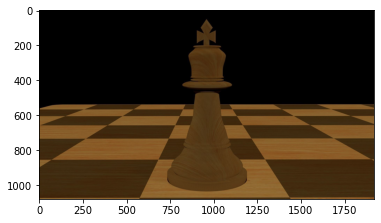

In [7]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
 
train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.1) # set validation split

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [10]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(6, activation='softmax')  
])

In [11]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [12]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=50,
                              verbose=2)

Epoch 1/50
63/63 - 27s - loss: 1.8230 - accuracy: 0.1743 - val_loss: 1.7877 - val_accuracy: 0.1923
Epoch 2/50
63/63 - 23s - loss: 1.7878 - accuracy: 0.1924 - val_loss: 1.7820 - val_accuracy: 0.1923
Epoch 3/50
63/63 - 28s - loss: 1.7599 - accuracy: 0.2325 - val_loss: 1.7665 - val_accuracy: 0.2115
Epoch 4/50
63/63 - 26s - loss: 1.7289 - accuracy: 0.2265 - val_loss: 1.8225 - val_accuracy: 0.1923
Epoch 5/50
63/63 - 27s - loss: 1.6909 - accuracy: 0.2505 - val_loss: 1.7757 - val_accuracy: 0.2115
Epoch 6/50
63/63 - 27s - loss: 1.6917 - accuracy: 0.2766 - val_loss: 1.7180 - val_accuracy: 0.2885
Epoch 7/50
63/63 - 27s - loss: 1.6675 - accuracy: 0.2766 - val_loss: 1.7712 - val_accuracy: 0.2115
Epoch 8/50
63/63 - 27s - loss: 1.5999 - accuracy: 0.3387 - val_loss: 1.6964 - val_accuracy: 0.2692
Epoch 9/50
63/63 - 27s - loss: 1.5396 - accuracy: 0.3928 - val_loss: 1.7572 - val_accuracy: 0.3269
Epoch 10/50
63/63 - 28s - loss: 1.4846 - accuracy: 0.4228 - val_loss: 1.6688 - val_accuracy: 0.3462
Epoch 11/

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()